In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedKFold
from tensorflow.keras import layers, losses, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM

In [4]:
import glob
instances=[np.load(result) for result in glob.glob('results/*.npy')]
array = np.array([instance[:,:92][1] for instance in instances])
df=pd.DataFrame(array)
df

,0


<Axes: xlabel='Time [s]', ylabel='Normalized intensity'>

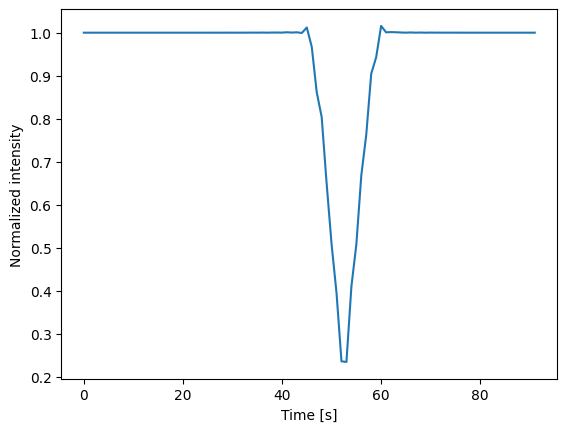

In [19]:
plt.xlabel('Time [s]')
plt.ylabel('Normalized intensity')
df.loc[4099].plot()

In [77]:
df2 = pd.read_csv('results/taosii_circle_simulation_features.csv')
df2 = df2.iloc[: , 1:]
df2['tipo'] = 1
from sklearn.preprocessing import KBinsDiscretizer
for column in df2.columns:
    X = np.array(df2[column]).reshape(-1,1)
    est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans', subsample=None)
    est.fit(X)
    df2[column] = est.transform(X).reshape(-1)
df2

/h1/cesanchez/penv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:269: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/h1/cesanchez/penv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:269: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(
/h1/cesanchez/penv/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:269: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn(


,diameter,ua,toffset,T,b,D,z,R_star,tipo
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4095,3.0,3.0,0.0,0.0,3.0,3.0,3.0,3.0,0.0
4096,3.0,3.0,0.0,0.0,3.0,3.0,3.0,3.0,0.0
4097,3.0,3.0,0.0,0.0,3.0,3.0,3.0,3.0,0.0
4098,3.0,3.0,0.0,0.0,3.0,3.0,3.0,3.0,0.0


In [78]:
def get_model(n_inputs, n_outputs):
 model = Sequential()
 model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
 model.add(Dense(n_outputs))
 model.compile(loss='mae', optimizer='adam')
 return model
 

def evaluate_model(X, y):
 results = list()
 n_inputs, n_outputs = X.shape[1], y.shape[1]
 cv = RepeatedKFold(n_splits=10, n_repeats=3)
 for train_ix, test_ix in cv.split(X):
     X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
     #X_test = pd.concat([X_test, ones], axis=0)
     y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
     #y_test = pd.concat([y_test, noise], axis=0)
     model = get_model(n_inputs, n_outputs)
     history = model.fit(tf.convert_to_tensor(X_train), tf.convert_to_tensor(y_train), verbose=0, epochs=100)
     mae = model.evaluate(tf.convert_to_tensor(X_test), tf.convert_to_tensor(y_test), verbose=0)
     results.append([history, mae, model])
 return results
results = evaluate_model(df,df2)

In [92]:
model.save('model1.keras')

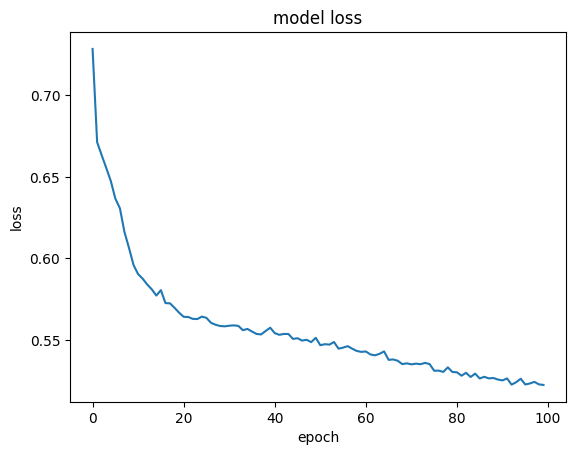

In [79]:
history = results[-1][0]
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
history

In [89]:
model = results[-1][2]
model.predict(np.ones((1,92)))

1/1 [==============================] - 0s 74ms/step


array([[ 9.3656015e-01,  1.0584993e+00,  1.4988407e-03, -6.5898746e-03,
         1.9709694e+00,  2.0632734e+00,  1.0624419e+00,  1.0806653e+00,
         1.7478224e-03]], dtype=float32)

In [88]:
np.ones((1,92))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [93]:
! git add . && git commit -m "feat: train neuronal network" && git push

whose behaviour will change in Git 2.0 with respect to paths you removed.
Paths like 'model.ipynb' that are
removed from your working tree are ignored with this version of Git.

* 'git add --ignore-removal <pathspec>', which is the current default,
  ignores paths you removed from your working tree.

* 'git add --all <pathspec>' will let you also record the removals.

Run 'git status' to check the paths you removed from your working tree.

[main 793a822] feat: train neuronal network
 6 files changed, 2920 insertions(+), 26 deletions(-)
 create mode 100644 classification.ipynb
 create mode 100644 detection.ipynb
 create mode 100644 model1.keras
Counting objects: 12, done.
Delta compression using up to 20 threads.
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 158.73 KiB | 0 bytes/s, done.
Total 8 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
remote: To git@github.com:sanchezcarlosjr/taos_ii_neuronal_networks.git
